# CMIP7 Assessment Fast Track Rapid Evaluation Framework OpenAPI Demo

This Jupyter notebook shows how to use the OpenAPI described at https://api.climate-ref.org/docs to download CMIP7 Assessment Fast Track Rapid Evaluation Framework results and use those to do your own analyses.

## Installation

We start by generating and installing a Python package for interacting with the API:

In [1]:
!uvx --from openapi-python-client openapi-python-client generate --url https://api.climate-ref.org/api/v1/openapi.json --meta setup --output-path climate_ref_client --overwrite

Generating climate_ref_clientib==0.2.14                                                      


In [2]:
!pip install ./climate_ref_client

Processing ./climate_ref_client
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for climate-rapid-evaluation-framework-client: filename=climate_rapid_evaluation_framework_client-0.1.0-py3-none-any.whl size=80066 sha256=429c94871c76699e9ff6ce5b711234e1c3b35cdf76d08d34325363b86dc97115
  Stored in directory: /tmp/pip-ephem-wheel-cache-29yau94w/wheels/3d/3d/fe/d2f63902f5265cff0f717cb676c3b3e0c6ad76b6a121afc5a9
Successfully built climate-rapid-evaluation-framework-client


## Set up the notebook

Import some libraries and load the [rich](https://rich.readthedocs.io/en/latest/introduction.html) Jupyter notebook extension for pretty printing large data structures.

In [229]:
from pathlib import Path

import requests
import xarray as xr
from climate_rapid_evaluation_framework_client import Client
from climate_rapid_evaluation_framework_client.api.diagnostics import diagnostics_list
from climate_rapid_evaluation_framework_client.api.executions import executions_get
from IPython.display import Markdown

In [215]:
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


## View the available diagnostics

We start by setting up a client for interacting with the server:

In [3]:
client = Client("https://api.climate-ref.org")

Retrieve the available diagnostics from the server:

In [206]:
diagnostics = diagnostics_list.sync(client=client).data
diagnostics[0]


DiagnosticSummary(
    id=25,
    provider=ProviderSummary(slug='esmvaltool', name='ESMValTool', additional_properties={}),
    slug='climate-at-global-warming-levels',
    name='Climate at Global Warming Levels',
    description='\nCalculate climate variables at global warming levels.\n',
    execution_groups=[6507, 6508, 6509, 6510],
    has_metric_values=False,
    has_scalar_values=False,
    has_series_values=False,
    execution_count=16,
    successful_execution_count=4,
    execution_group_count=4,
    successful_execution_group_count=4,
    group_by=[GroupBy(source_type='cmip6', group_by=['experiment_id'], additional_properties={})],
    aft_link=AFTDiagnosticDetail(
        id='5.3',
        name='Evaluation of key climate variables at global warming levels',
        theme='Impacts and Adaptation',
        version_control='version 1 - 24-11-04 REF launch',
        reference_dataset='GPCP-SG-2-3, HadCRUT5-0-2-0',
        endorser='CMIP Model Benchmarking Task Team',
        p

Create a list of available diagnostics with short descriptions

In [217]:
txt = ""
for diagnostic in diagnostics:
    title = f"{diagnostic.name}"
    underline = "-" * len(title)
    description = diagnostic.description.strip()
    if not description.endswith("."):
        description += "."
    if diagnostic.aft_link:
        description += " " + diagnostic.aft_link.short_description.strip()
    if not description.endswith("."):
        description += "."
    txt += f"{title}\n{underline}\n{description}\n\n"
Markdown(txt)

Climate at Global Warming Levels
--------------------------------
Calculate climate variables at global warming levels. This diagnostic calculates years of Global Warming Level (GWL) exceedances in CMIP models as described in Swaminathan et al (2022). Time series of the anomalies in annual global mean surface air temperature (GSAT) are calculated with respect to the 1850-1900 time-mean of each individual time series. To limit the influence of short-term variability, a 21-year centered running mean is applied to the time series. The year at which the time series exceeds warming levels or temperatures such as 1.5C is then recorded for the specific model ensemble member and future scenario. Once the years of exceedance are calculated, the time averaged global mean and standard deviation for the multimodel ensemble over the 21-year period around the year of exceedance are plotted.

Climate Drivers for Fire
------------------------
Calculate diagnostics regarding climate drivers for fire. The diagnostic relies on the processing of fire climate drivers through the ConFire model and is based on Jones et al. (2024). The diagnostic computes the burnt fraction for each grid cell based on a number of drivers. Additionally, the respective controls due to fire weather and fuel load/continuity are computed. The stochastic control corresponds to the unmodelled processed influencing to fire occurrence.

Cloud Radiative Effects
-----------------------
Plot climatologies and zonal mean profiles of cloud radiative effects (sw + lw) for a dataset. Maps and zonal means of longwave and shortwave cloud radiative effect.

Cloud-Temperature Scatterplots (cli vs ta)
------------------------------------------
Scatterplot of cli vs ta. 2D histograms with focus on clouds.

Cloud-Radiation Scatterplots (clivi vs lwcre)
---------------------------------------------
Scatterplot of clivi vs lwcre. 2D histograms with focus on clouds.

Cloud-Radiation Scatterplots (clt vs swcre)
-------------------------------------------
Scatterplot of clt vs swcre. 2D histograms with focus on clouds.

Cloud-Precipitation Scatterplots (clwvi vs pr)
----------------------------------------------
Scatterplot of clwvi vs pr. 2D histograms with focus on clouds.

Cloud Scatterplots for Reference dataset
----------------------------------------
Reference scatterplots of two cloud-relevant variables. 2D histograms with focus on clouds.

ENSO Basic Climatology
----------------------
Calculate the ENSO CLIVAR metrics - background climatology. ENSO CLIVAR metrics - reproducing background climatology and ENSO characteristics.

ENSO Characteristics
--------------------
Calculate the ENSO CLIVAR metrics - basic ENSO characteristics. ENSO CLIVAR metrics - reproducing background climatology and ENSO characteristics.

Equilibrium Climate Sensitivity (ECS)
-------------------------------------
Calculate the global mean equilibrium climate sensitivity for a dataset. Equilibrium climate sensitivity is defined as the change in global mean temperature as a result of a doubling of the atmospheric CO2 concentration compared to pre-industrial times after the climate system has reached a new equilibrium. This diagnostic uses a regression method based on Gregory et al. (2004).

Global Mean Timeseries
----------------------
Calculate the annual mean global mean timeseries for a dataset.

Regional Historical Annual Cycle
--------------------------------
Plot regional historical annual cycle of climate variables. Time series, linear trend, and annual cycle for IPCC regions.

Regional Historical Timeseries
------------------------------
Plot regional historical mean and anomaly of climate variables. Time series, linear trend, and annual cycle for IPCC regions.

Regional Historical Trends
--------------------------
Plot regional historical trend of climate variables. Time series, linear trend, and annual cycle for IPCC regions.

Sea Ice Area Basic Metrics
--------------------------
Calculate seasonal cycle and time series of NH and SH sea ice area. Seasonal cycle of Arctic (NH) and Antarctic (SH) sea ice area, time series of Arctic September (NH) and Antarctic February (SH) sea ice area.

Sea Ice Sensitivity
-------------------
Calculate sea ice sensitivity. Rate of sea ice area loss per degree of warming, as in plot 1d of Notz et al. and figure 3e of Roach et al.

Transient Climate Response (TCR)
--------------------------------
Calculate the global mean transient climate response for a dataset. The transient climate response (TCR) is defined as the global and annual mean surface air temperature anomaly in the 1pctCO2 scenario (1% CO2 increase per year) for a 20 year period centered at the time of CO2 doubling, i.e. using the years 61 to 80 after the start of the simulation. We calculate the temperature anomaly by subtracting a linear fit of the piControl run for all 140 years of the 1pctCO2 experiment prior to the TCR calculation (see Gregory and Forster, 2008).

Transient Climate Response to Emissions (TCRE)
----------------------------------------------
Calculate the global mean Transient Climate Response to Cumulative CO2 Emissions. The idea that global temperature rise is directly proportional to the total amount of carbon dioxide (CO2) released into the atmosphere is fundamental to climate policy. The concept stems from research showing a clear linear relationship between cumulative CO2 emissions and global temperature change in climate models (Allen et al. 2009; Matthews et al. 2009; Zickfeld et al. 2009). This relationship is called the Transient Climate Response to Cumulative CO2 Emissions (TCRE), which represents the amount of global warming caused by each trillion tonnes of carbon emitted. This simple yet powerful tool allows policymakers to directly link emission budgets to specific temperature targets and compare the long-term effects of different emissions scenarios.

Zero Emission Commitment (ZEC)
------------------------------
Calculate the global mean Zero Emission Commitment (ZEC) temperature. The Zero Emissions Commitment (ZEC) quantifies the change in global mean temperature expected to occur after net carbon dioxide (CO2) emissions cease. ZEC is therefore important to consider when estimating the remaining carbon budget. Calculation of ZEC requires dedicated simulations with emissions set to zero, branching off a base simulation with emissions. In CMIP6 the simulations were part of ZECMIP, with the simulations called esm-1pct-brch-xPgC branching off the 1pctCO2 simulation when emissions reach x PgC. The default x was 1000PgC, with additional simulations for 750PgC and 2000PgC. In CMIP7, ZEC simulations (esm-flat10-zec) are part of the fast track and branch off (esm-flat10) with constant emissions of 10GtC/yr at year 100 (Sanderson 2024).

Atlantic Meridional Overturning Circulation (RAPID)
---------------------------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Comparison of the model Atlantic meridional ocean circulation (AMOC) circulation strength with refernce data from RAPID-v2023-1.

Burnt Fraction (GFED)
---------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. The diagnostic relies on the processing of fire climate drivers through the ConFire model and is based on Jones et al. (2024). The diagnostic computes the burnt fraction for each grid cell based on a number of drivers. Additionally, the respective controls due to fire weather and fuel load/continuity are computed. The stochastic control corresponds to the unmodelled processed influencing to fire occurrence.

Soil Carbon (HWSD2)
-------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model soil carbon with reference data from HWSD-2-0 and NCSCD-2-2.

Gross Primary Productivity (FLUXNET2015)
----------------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset.

Gross Primary Productivity (WECANN)
-----------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model gross primary production (GPP) with reference data from FLUXNET2015-1-0 and WECANN-1-0.

Leaf Area Index (AVH15C1)
-------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model leaf area index (LAI) with reference data from NOAA-NCEI-LAI-5-0, and LAI4g-1-2.

Runoff (LORA)
-------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model surface runoff with reference data from LORA-1-1.

Surface Soil Moisture (WangMao)
-------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model surface soil moisture with reference data from OLC-ORS-V0.

Net Biome Productivity (Hoffman)
--------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Comparison of the model integrated land net ecosystem carbon balance with reference data from HOFFMAN-1-0.

Ocean Heat Content (NOAA)
-------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model ocean heat content (OHC) with reference data from MGOHCTA-WOA09.

Snow Cover (ESA CCI)
--------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model snow cover with reference data from CCI-CryoClim-FSC-1.

Sea Water Salinity (WOA2023 Surface)
------------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model sea surface temperature (SST) and sea surface salinity (SSS) with reference data from WOA2023.

Sea Water Temperature (WOA2023 Surface)
---------------------------------------
Apply the standard ILAMB analysis with respect to a given reference dataset. Apply the ILAMB Methodology* to compare the model sea surface temperature (SST) and sea surface salinity (SSS) with reference data from WOA2023.

Annual Cycle Analysis
---------------------
Calculate the annual cycle for a dataset. Maps of seasonal and annual climatology are generated for the reference datasets and model output on a target grid (2.5x2.5 deg), then calculate diverse metrics including bias, RMSE, spatial pattern correlation, and standard deviation.

ENSO Processes
--------------
Calculate the ENSO performance metrics for a dataset. ENSO CLIVAR metrics - reproducing background climatology and ENSO characteristics.

ENSO Teleconnections
--------------------
Calculate the ENSO performance metrics for a dataset. ENSO CLIVAR metrics - reproducing background climatology and ENSO characteristics.

Northern Annular Mode (NAM)
---------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.

North Atlantic Oscillation (NAO)
--------------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.

North Pacific Gyre Oscillation (NPGO)
-------------------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.

North Pacific Oscillation (NPO)
-------------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.

Pacific Decadal Oscillation (PDO)
---------------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.

Pacific North American Pattern (PNA)
------------------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.

Southern Annular Mode (SAM)
---------------------------
Calculate the extratropical modes of variability for a given area. For extratropical modes of variability, maps of variability mode pattern and thier principal component time series are generated from the reference dataset and model output. Then maps are compared to calculate bias, RMSE, and spatial pattern correlation, and time series are compared to calculate the ratio from their stand deviations.



## Global warming levels - creating a map plot

We will look at the global warming levels diagnostic and create our own figure using the available data. Each diagnostic can be run (executed) multiple times with different input data. The global warmings levels diagnostic has been executed several times, leading to multiple "execution groups":

In [211]:
global_warming_levels = next(
    diagnostic for diagnostic in diagnostics if diagnostic.name == "Climate at Global Warming Levels"
)
[executions_get.sync(group, client=client).key for group in global_warming_levels.execution_groups]

['cmip6_ssp126', 'cmip6_ssp245', 'cmip6_ssp370', 'cmip6_ssp585']

Let's select the "ssp585" scenario and look at the output files that were produced:

In [219]:
for group in global_warming_levels.execution_groups:
    execution = executions_get.sync(group, client=client)
    if execution.key.endswith("ssp585"):
        ssp585_outputs = execution.latest_execution.outputs
        break
else:
    msg = "Failed to find the ssp585 execution group"
    raise ValueError(msg)
[o.filename for o in ssp585_outputs]


[
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_1.5.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_2.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_3.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_4.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_5.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_stdev_1.5.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_stdev_2.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_stdev_3.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_stdev_4.0.png',
    'executions/recipe_20251002_035030/plots/gwl_mean_plots_tas/pl

Let's select one of the output files, download it and create our own plot:

In [243]:
file = next(
    file for file in ssp585_outputs if file.filename.endswith("tas/plot_gwl_stats/CMIP6_mm_mean_2.0.nc")
)
file


ExecutionOutput(
    id=115129,
    execution_id=58273,
    output_type=<ResultOutputType.DATA: 'data'>,
    filename='executions/recipe_20251002_035030/work/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_2.0.nc',
    short_name='executions/recipe_20251002_035030/work/gwl_mean_plots_tas/plot_gwl_stats/CMIP6_mm_mean_2.0.nc',
    long_name='Multimodel mean of Temperature at 2.0 $^\\circ$ C',
    description='',
    created_at=datetime.datetime(2025, 10, 2, 4, 7, 28),
    updated_at=datetime.datetime(2025, 10, 2, 4, 7, 28),
    url='https://api.climate-ref.org//api/v1/results/115129',
    additional_properties={}
)

Download the file and open it with `xarray`:

In [248]:
local_file = Path(Path(file.filename).name)
local_file.write_bytes(requests.get(file.url).content)
ds = xr.open_dataset(local_file).drop_vars("cube_label")
ds

<xarray.Dataset> Size: 272kB
Dimensions:    (lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    time       datetime64[ns] 8B ...
Dimensions without coordinates: bnds
Data variables:
    tas        (lat, lon) float32 259kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    time_bnds  (bnds) datetime64[ns] 16B ...
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.12.0
    caption:      Multimodel mean of Temperature at 2.0 $^\circ$ C

Create our own plot:

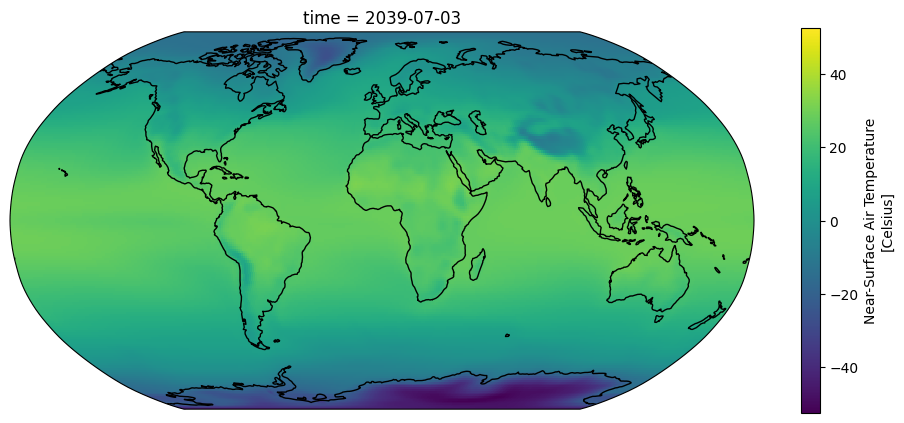

In [249]:
plot = ds.tas.plot(
    cmap="viridis",
    figsize=(12, 5),
    transform=cartopy.crs.PlateCarree(),
    subplot_kws={
        "projection": cartopy.crs.Robinson(),
    },
)
plot.axes.coastlines();

## Sea ice area - create series plots

In [254]:
sea_ice_area = next(
    diagnostic for diagnostic in diagnostics if diagnostic.name == "Sea Ice Area Basic Metrics"
)
len(sea_ice_area.execution_groups)

116

In [266]:
from climate_rapid_evaluation_framework_client.api.diagnostics import diagnostics_list_metric_values
from climate_rapid_evaluation_framework_client.models.metric_value_type import MetricValueType

series = diagnostics_list_metric_values.sync(
    sea_ice_area.provider.slug, sea_ice_area.slug, value_type=MetricValueType.SERIES, client=client
).data
series[0]


SeriesValue(
    id=568190,
    dimensions=SeriesValueDimensions(
        additional_properties={
            'source_id': 'ACCESS-ESM1-5',
            'grid_label': 'gn',
            'member_id': 'r10i1p1f1',
            'region': 'Northern Hemisphere',
            'statistic': '20-year average seasonal cycle of the sea ice area'
        }
    ),
    values=[
        12.625557899475098,
        13.885064125061035,
        14.218955993652344,
        13.654378890991211,
        11.968358993530273,
        9.601765632629395,
        7.028141498565674,
        4.875391006469727,
        4.349080562591553,
        5.6265997886657715,
        7.671941757202148,
        10.290356636047363
    ],
    execution_group_id=7678,
    execution_id=74747,
    index=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0],
    index_name='month_number',
    attributes=SeriesValueAttributesType0(
        additional_properties={
            'caption': '20-year average seasonal cycle of the sea

In [258]:
execution = executions_get.sync(sea_ice_area.execution_groups[0], client=client)
print(execution.key, execution.latest_execution.successful)
[o.filename for o in execution.latest_execution.outputs]

cmip6_gn_r10i1p1f1_ACCESS-CM2 True



[
    'executions/recipe_20251003_125750/plots/siarea_seas/allplots/annual_cycle_sea_ice_area_nh_ambiguous_dataset_ambiguous_mip_historical_ambiguous_ensemble.png',
    'executions/recipe_20251003_125750/plots/siarea_seas/allplots/annual_cycle_sea_ice_area_sh_ambiguous_dataset_ambiguous_mip_historical_ambiguous_ensemble.png',
    'executions/recipe_20251003_125750/plots/siarea_min/allplots/timeseries_sea_ice_area_nh_sep_ambiguous_dataset_ambiguous_mip_historical_ambiguous_ensemble.png',
    'executions/recipe_20251003_125750/plots/siarea_min/allplots/timeseries_sea_ice_area_sh_feb_ambiguous_dataset_ambiguous_mip_historical_ambiguous_ensemble.png',
    'executions/recipe_20251003_125750/work/siarea_seas/allplots/annual_cycle_sea_ice_area_nh_ambiguous_dataset_ambiguous_mip_historical_ambiguous_ensemble.nc',
    'executions/recipe_20251003_125750/work/siarea_seas/allplots/annual_cycle_sea_ice_area_sh_ambiguous_dataset_ambiguous_mip_historical_ambiguous_ensemble.nc',
    'executions/recip

In [259]:
execution


ExecutionGroup(
    id=7676,
    key='cmip6_gn_r10i1p1f1_ACCESS-CM2',
    dirty=False,
    executions=[
        Execution(
            id=54800,
            dataset_hash='8c1c179ff42b60f70175dd8ebc48f344eca3a871',
            dataset_count=2,
            successful=False,
            retracted=False,
            created_at=datetime.datetime(2025, 10, 2, 2, 7, 1),
            updated_at=datetime.datetime(2025, 10, 2, 2, 7, 1),
            outputs=[],
            additional_properties={}
        ),
        Execution(
            id=56459,
            dataset_hash='8c1c179ff42b60f70175dd8ebc48f344eca3a871',
            dataset_count=2,
            successful=False,
            retracted=False,
            created_at=datetime.datetime(2025, 10, 2, 2, 55, 24),
            updated_at=datetime.datetime(2025, 10, 2, 2, 56, 40),
            outputs=[],
            additional_properties={}
        ),
        Execution(
            id=58118,
            dataset_hash='8c1c179ff42b60f70175dd8ebc48